<center>
<img src="https://supportvectors.ai/logo-poster-transparent.png" width="400px" style="opacity:0.7">
</center>

In [1]:
%run supportvectors-common.ipynb


<div style="color:#aaa;font-size:8pt">
<hr/>
&copy; SupportVectors. All rights reserved. <blockquote>This notebook is the intellectual property of SupportVectors, and part of its training material. 
Only the participants in SupportVectors workshops are allowed to study the notebooks for educational purposes currently, but is prohibited from copying or using it for any other purposes without written permission.

<b> These notebooks are chapters and sections from Asif Qamar's textbook that he is writing on Data Science. So we request you to not circulate the material to others.</b>
 </blockquote>
 <hr/>
</div>



In [2]:
from PIL import Image
import requests
from transformers import AutoProcessor, AutoModel
import torch
from svlearn_vlu import config

model_name = config["siglip2"]["model"]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps") if torch.backends.mps.is_available() else device
processor = AutoProcessor.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device).eval()


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [4]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)

In [6]:
from transformers import pipeline
zero_shot_pipeline = pipeline(task="zero-shot-image-classification", model=model_name, device = device, dtype=torch.bfloat16)
outputs = zero_shot_pipeline(image, candidate_labels=["a photo of a cat", "a photo of a dog"])
outputs

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use mps


[{'score': 0.003173828125, 'label': 'a photo of a cat'},
 {'score': 6.5267086029052734e-06, 'label': 'a photo of a dog'}]

### Image Retrieval



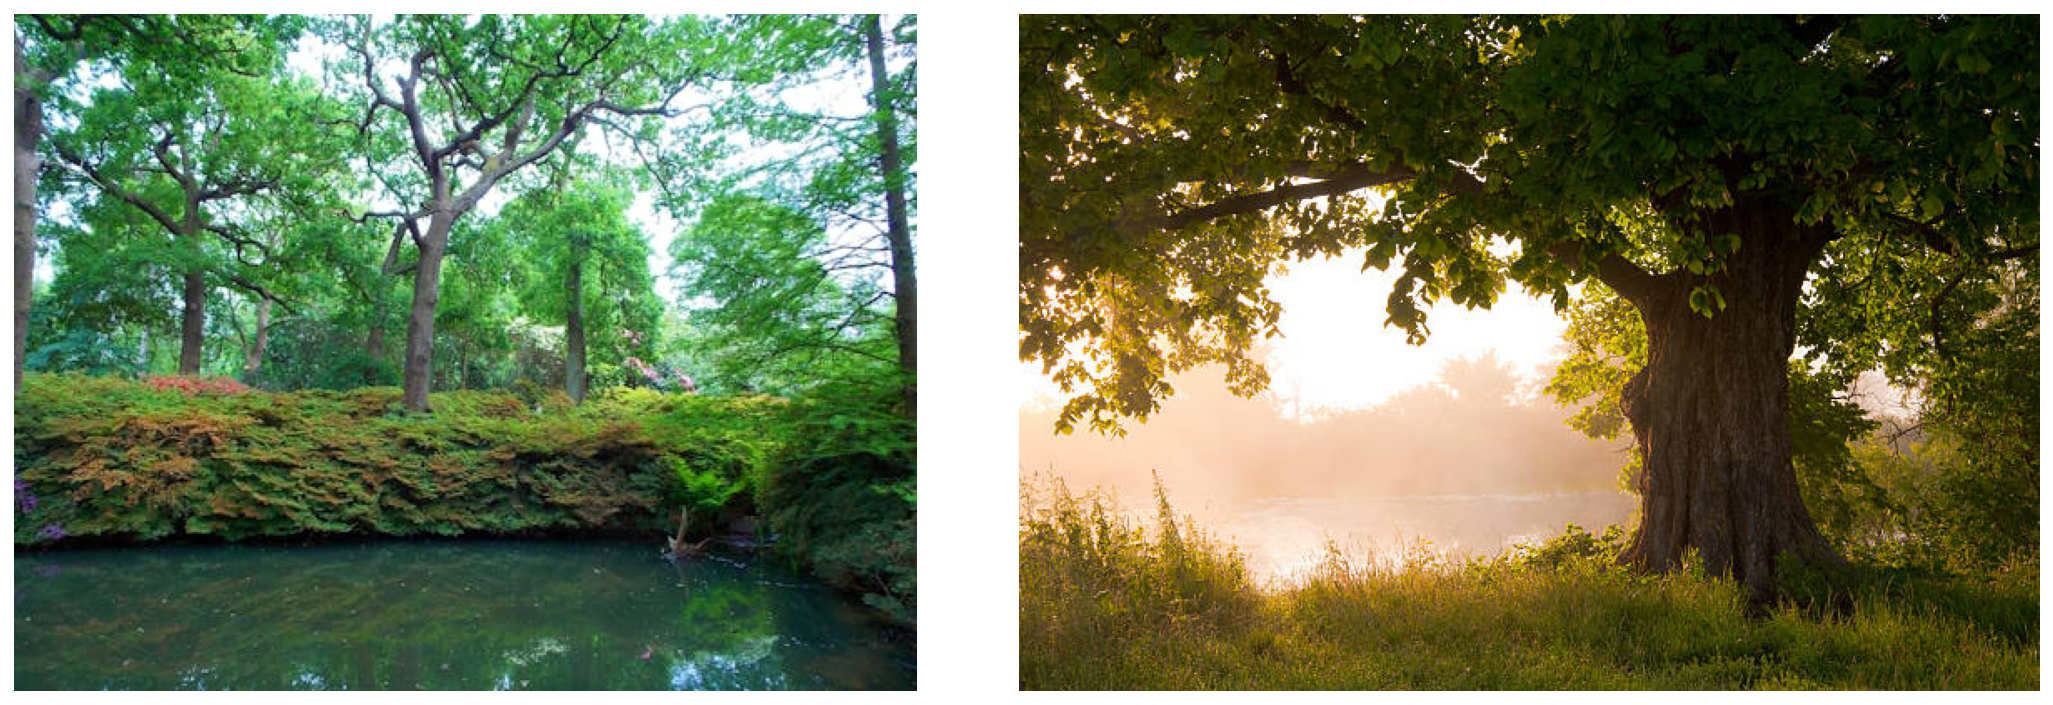

In [7]:
from svlearn_vlu.siglip2.query_images import search_similar_images, show_images_as_subplots

query = "a photo of a lake"
results = search_similar_images(query, top_k=2)

show_images_as_subplots(results)


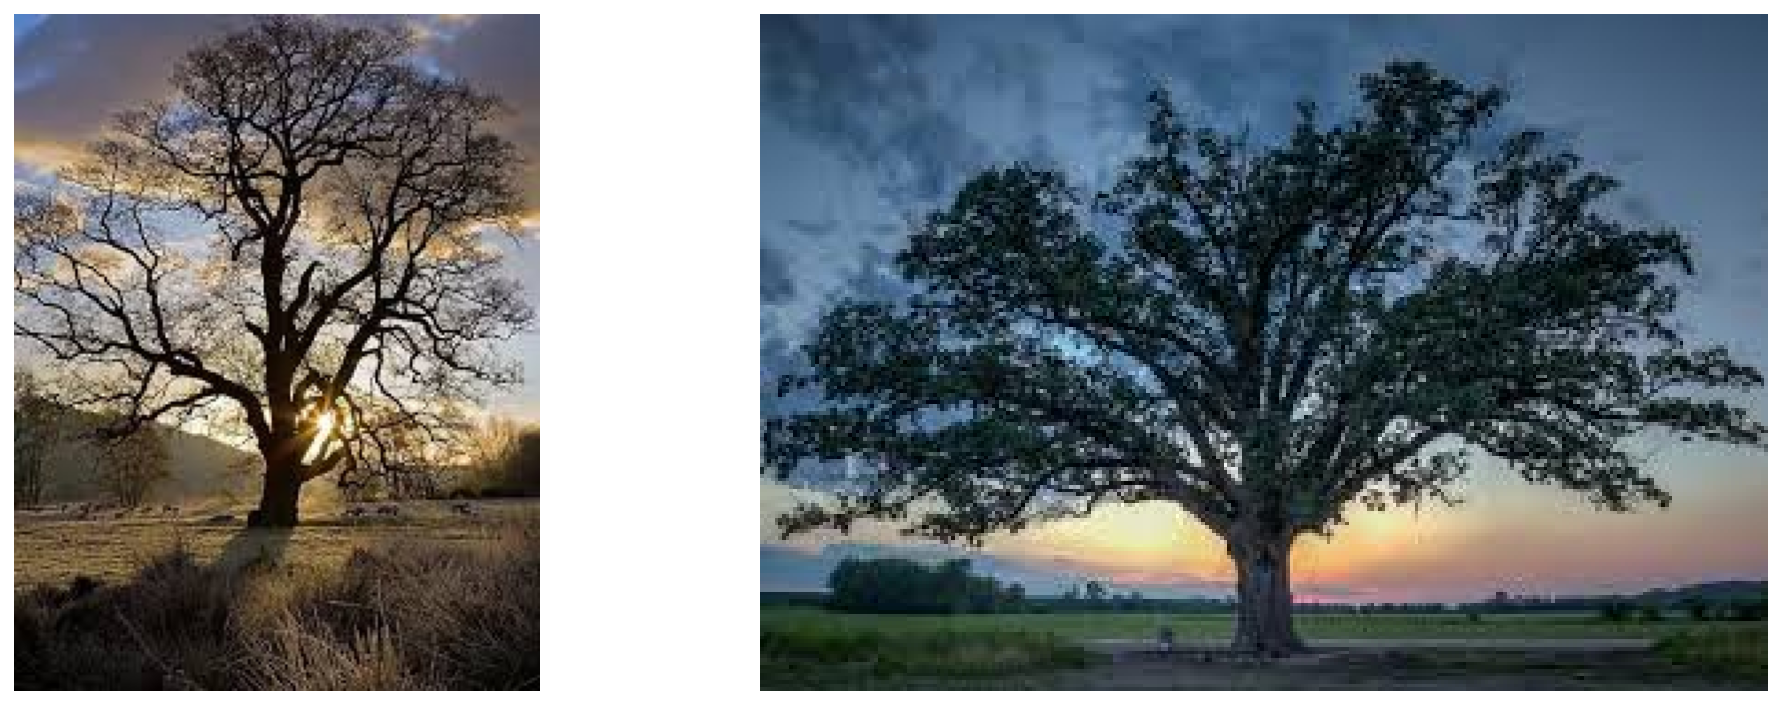

In [8]:
query = "a photo of sunset"
results = search_similar_images(query, top_k=2)

show_images_as_subplots(results)

# for result in results:
#     print(f"Score: {result.score}, Path: {result.payload['path']}")

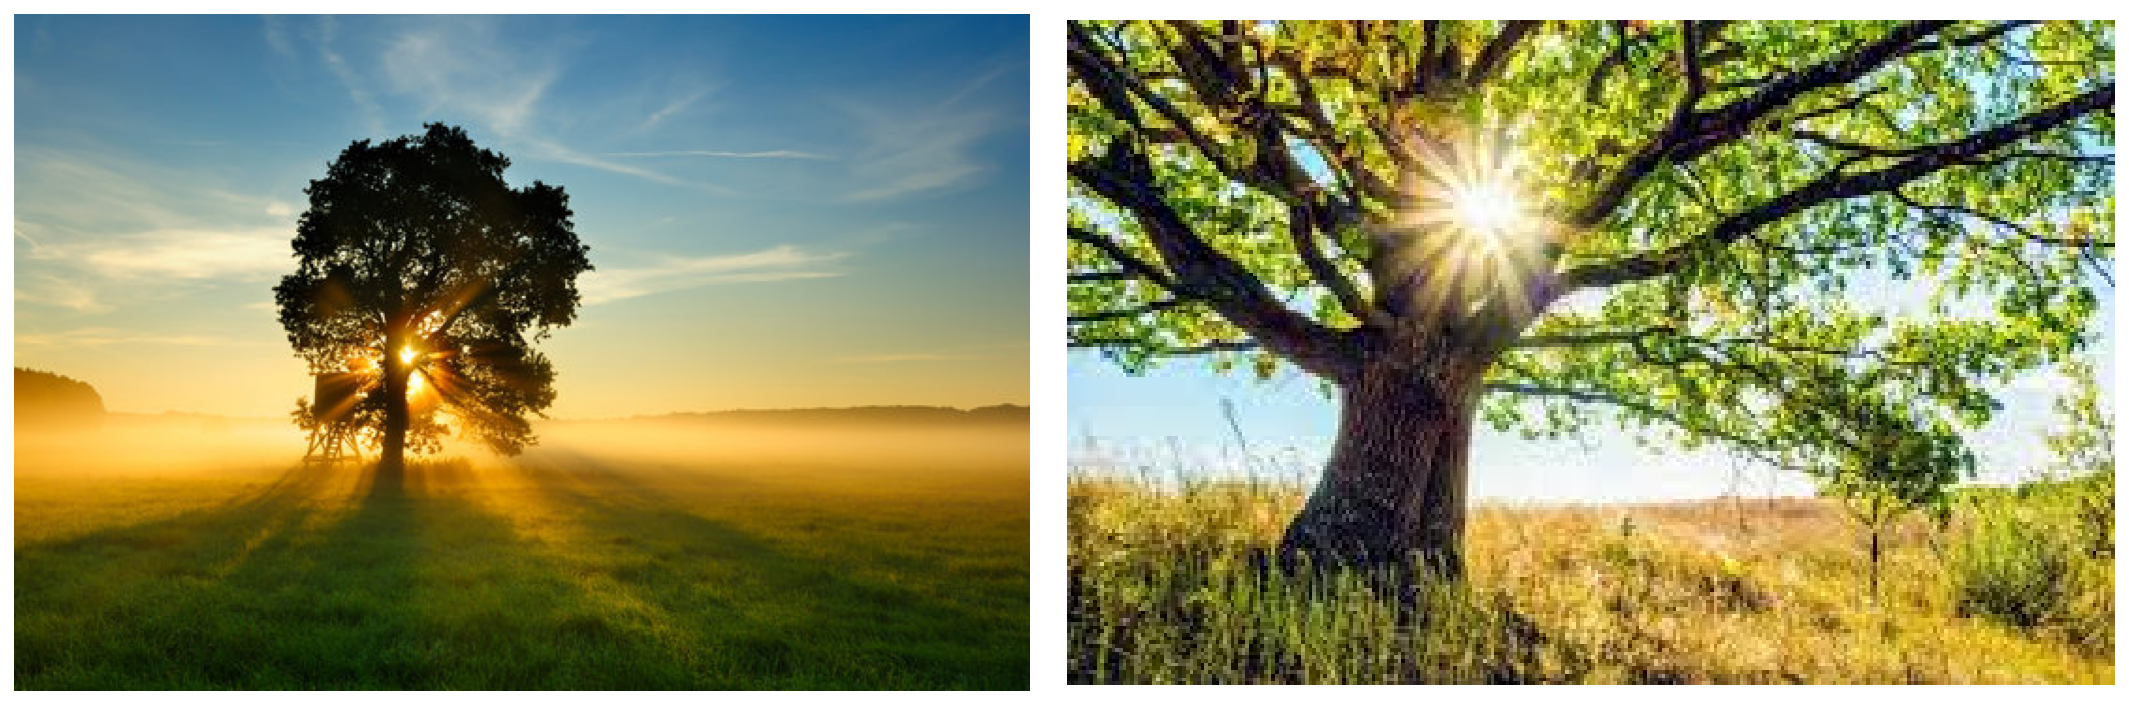

In [9]:
query = "bright sun"
results = search_similar_images(query, top_k=2)

show_images_as_subplots(results)